<a href="https://colab.research.google.com/github/lolobq/ECGR-5105-Intro_To_Machine_Learning/blob/main/Homework1/ECGR_5105_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import csv data from my GitHub repo
url = 'https://raw.githubusercontent.com/lolobq/ECGR-5105-Intro_To_Machine_Learning/master/Homework1/D3.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


# Code for Problem 1:

Data Reshaping + Initialization

In [3]:
# Separate features and labels
x1 = df.values[:, 0]  # Get input values from first column -- x1 is a 1D array
x2 = df.values[:, 1]  # Get input values from second column -- x2 is a 1D array
x3 = df.values[:, 2]  # Get input values from third column -- X3 is a 1D array
y = df.values[:, 3]  # Get input values from fourth column -- Y is a 1D array

m = len(y)  # Number of training examples

In [4]:
# Create a column vector of ones. This will be used as the "bias" term for the linear regression model.
x_0 = np.ones((m, 1))

# Reshape features (X) to make them 2D arrays suitable for matrix operations.
x_1 = x1.reshape(m, 1)
x_2 = x2.reshape(m, 1)
x_3 = x3.reshape(m, 1)

# Numpy hstack function stacks columns horizontally (builds a list of 1x2 arrays containing the values for x_0 and x_1)
x_1_data = np.hstack((x_0, x_1))
x_2_data = np.hstack((x_0, x_2))
x_3_data = np.hstack((x_0, x_3))

# Initialize iterations, and alpha
iterations_1 = 1500
alpha_1_1 = 0.01
alpha_1_2 = 0.05
alpha_1_3 = 0.1

Compute Cost Function

In [5]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

Gradient Descent Function

In [6]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

Calculate Theta and Cost History Values for All 3 Variables Separately

In [7]:
# Calculate the theta and cost history values for each variable separately for each alpha variable
# X0 and X1
theta = np.zeros(2)
theta1_1, cost_history_1_1 = gradient_descent(x_1_data, y, theta, alpha_1_1, iterations_1) # For alpha = 0.01

theta = np.zeros(2)
theta1_2, cost_history_1_2 = gradient_descent(x_1_data, y, theta, alpha_1_2, iterations_1) # For alpha = 0.05

theta = np.zeros(2)
theta1_3, cost_history_1_3 = gradient_descent(x_1_data, y, theta, alpha_1_3, iterations_1) # For alpha = 0.1

# X0 and X2
theta = np.zeros(2)
theta2_1, cost_history_2_1 = gradient_descent(x_2_data, y, theta, alpha_1_1, iterations_1) # For alpha = 0.01

theta = np.zeros(2)
theta2_2, cost_history_2_2 = gradient_descent(x_2_data, y, theta, alpha_1_2, iterations_1) # For alpha = 0.05

theta = np.zeros(2)
theta2_3, cost_history_2_3 = gradient_descent(x_2_data, y, theta, alpha_1_3, iterations_1) # For alpha = 0.1

# X0 and X3
theta = np.zeros(2)
theta3_1, cost_history_3_1 = gradient_descent(x_3_data, y, theta, alpha_1_1, iterations_1) # For alpha = 0.01

theta = np.zeros(2)
theta3_2, cost_history_3_2 = gradient_descent(x_3_data, y, theta, alpha_1_2, iterations_1) # For alpha = 0.05

theta = np.zeros(2)
theta3_3, cost_history_3_3 = gradient_descent(x_3_data, y, theta, alpha_1_3, iterations_1) # For alpha = 0.1


print(theta1_1)
print(theta2_1)
print(theta3_1)

[ 5.71850653 -1.9568206 ]
[0.71988473 0.56390334]
[ 2.78048129 -0.48451631]


Plot Models

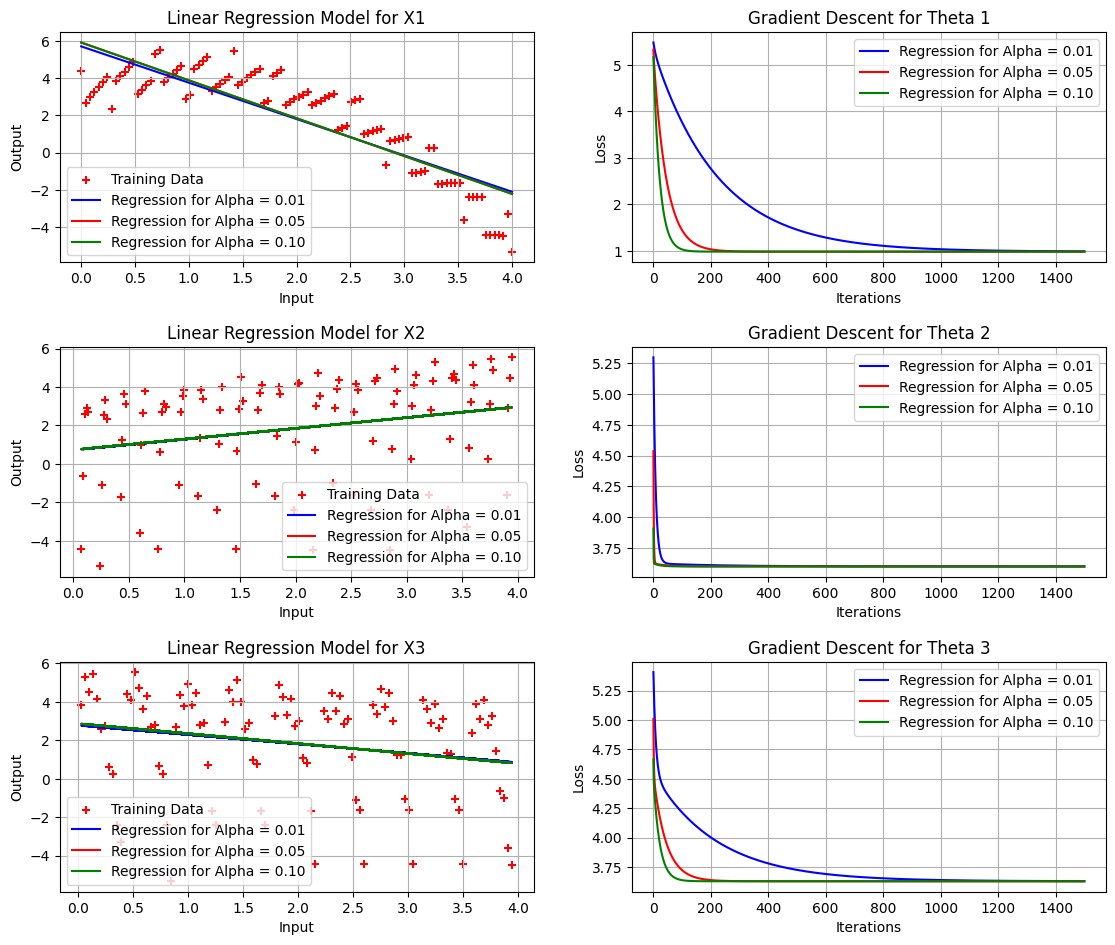

In [ ]:
# Create the subplots layout
plt.subplots(3,2,figsize=(12,10))
plt.tight_layout(pad=4)

################################################################################
# Linear Regression Plot for X1
plt.subplot(3,2,1)
plt.scatter(x_1_data[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(x_1_data[:, 1], x_1_data.dot(theta1_1), color='blue', label='Regression for Alpha = 0.01')
plt.plot(x_1_data[:, 1], x_1_data.dot(theta1_2), color='red', label='Regression for Alpha = 0.05')
plt.plot(x_1_data[:, 1], x_1_data.dot(theta1_3), color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X1')
plt.xlabel('Input')
plt.ylabel('Output')

# Gradient Descent Plot for X1
plt.subplot(3,2,2)
plt.plot(range(1, iterations_1 + 1), cost_history_1_1, color='blue', label='Regression for Alpha = 0.01')
plt.plot(range(1, iterations_1 + 1), cost_history_1_2, color='red', label='Regression for Alpha = 0.05')
plt.plot(range(1, iterations_1 + 1), cost_history_1_3, color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta 1')
plt.xlabel('Iterations')
plt.ylabel('Loss')

################################################################################
# Linear Regression Plot for X2
plt.subplot(3,2,3)
plt.scatter(x_2_data[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(x_2_data[:, 1], x_2_data.dot(theta2_1), color='blue', label='Regression for Alpha = 0.01')
plt.plot(x_2_data[:, 1], x_2_data.dot(theta2_2), color='red', label='Regression for Alpha = 0.05')
plt.plot(x_2_data[:, 1], x_2_data.dot(theta2_3), color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X2')
plt.xlabel('Input')
plt.ylabel('Output')

# Gradient Descent Plot for X2
plt.subplot(3,2,4)
plt.plot(range(1, iterations_1 + 1), cost_history_2_1, color='blue', label='Regression for Alpha = 0.01')
plt.plot(range(1, iterations_1 + 1), cost_history_2_2, color='red', label='Regression for Alpha = 0.05')
plt.plot(range(1, iterations_1 + 1), cost_history_2_3, color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta 2')
plt.xlabel('Iterations')
plt.ylabel('Loss')

################################################################################
# Linear Regression Plot for X3
plt.subplot(3,2,5)
plt.scatter(x_3_data[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(x_3_data[:, 1], x_3_data.dot(theta3_1), color='blue', label='Regression for Alpha = 0.01')
plt.plot(x_3_data[:, 1], x_3_data.dot(theta3_2), color='red', label='Regression for Alpha = 0.05')
plt.plot(x_3_data[:, 1], x_3_data.dot(theta3_3), color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X3')
plt.xlabel('Input')
plt.ylabel('Output')

# Gradient Descent Plot for X3
plt.subplot(3,2,6)
plt.plot(range(1, iterations_1 + 1), cost_history_3_1, color='blue', label='Regression for Alpha = 0.01')
plt.plot(range(1, iterations_1 + 1), cost_history_3_2, color='red', label='Regression for Alpha = 0.05')
plt.plot(range(1, iterations_1 + 1), cost_history_3_3, color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta 3')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.show()

Report Cost for Each Explanatory Variable

In [ ]:
# Cost for alpha = 0.01 -> get the last value of the cost history
x1_1_cost = cost_history_1_1[-1]
x2_1_cost = cost_history_2_1[-1]
x3_1_cost = cost_history_3_1[-1]

# Cost for alpha = 0.05 -> get the last value of the cost history
x1_2_cost = cost_history_1_2[-1]
x2_2_cost = cost_history_2_2[-1]
x3_2_cost = cost_history_3_2[-1]

# Cost for alpha = 0.1 -> get the last value of the cost history
x1_3_cost = cost_history_1_3[-1]
x2_3_cost = cost_history_2_3[-1]
x3_3_cost = cost_history_3_3[-1]

print("Costs for alpha = 0.01")
print("X1: ", x1_1_cost)
print("X2: ", x2_1_cost)
print("X3: ", x3_1_cost)

print("\nCosts for alpha = 0.05")
print("X1: ", x1_2_cost)
print("X2: ", x2_2_cost)
print("X3: ", x3_2_cost)

print("\nCosts for alpha = 0.10")
print("X1: ", x1_3_cost)
print("X2: ", x2_3_cost)
print("X3: ", x3_3_cost)

Costs for alpha = 0.01
X1:  0.9905894438682062
X2:  3.5993993982305357
X3:  3.6305262475389664

Costs for alpha = 0.05
X1:  0.9849930825406077
X2:  3.5993660181680425
X3:  3.629451124607917

Costs for alpha = 0.10
X1:  0.9849930825405946
X2:  3.599366018168041
X3:  3.6294511246079155


# Code for Problem 2:

Data Reshaping and Initialization


In [9]:
# Numpy hstack function stacks columns horizontally (builds a list of 1x2 arrays containing the values for x_0, x_1, x_2, and x_3)
total_data = np.hstack((x_0, x_1, x_2, x_3))

# Initialize iterations, and alpha
iterations_2 = 1500
alpha_2_1 = 0.01
alpha_2_2 = 0.05
alpha_2_3 = 0.1

Calculate Theta and Cost History

In [17]:
# Calculate theta and cost history for 3 different alpha values
theta = np.zeros(4)
total_theta_1, total_cost_history_1 = gradient_descent(total_data, y, theta, alpha_2_1, iterations_2)

theta = np.zeros(4)
total_theta_2, total_cost_history_2 = gradient_descent(total_data, y, theta, alpha_2_2, iterations_2)

theta = np.zeros(4)
total_theta_3, total_cost_history_3 = gradient_descent(total_data, y, theta, alpha_2_3, iterations_2)

Plot the Graph

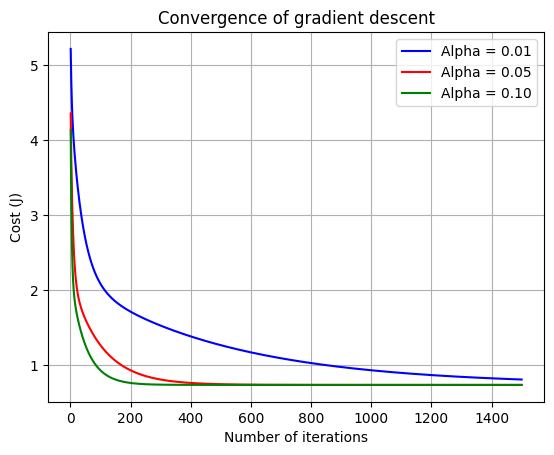

In [11]:
plt.plot(range(1, iterations_2 + 1), total_cost_history_1, color='blue', label = 'Alpha = 0.01')
plt.plot(range(1, iterations_2 + 1), total_cost_history_2, color='red', label = 'Alpha = 0.05')
plt.plot(range(1, iterations_2 + 1), total_cost_history_3, color='green', label = 'Alpha = 0.10')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.legend()
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

Function to Predict Values

In [12]:
def predict_value(x_in, theta_in):
    """
    Predict the y value using our theta values and given x values.

    Parameters:
    x_in : The x values to predict the output of
    theta_in : The theta values calculated from the gradient descent function

    Returns:
    y : Predicted value
    """
    y = theta_in[0]
    for x_val, theta_val in zip(x_in, theta_in[1:]):
      y += x_val * theta_val

    return y

Calculate Final Costs for Different Learning Rates

In [13]:
# Cost for alpha = 0.01 -> get the last value of the cost history
total_cost_1 = total_cost_history_1[-1]
total_cost_2 = total_cost_history_2[-1]
total_cost_3 = total_cost_history_3[-1]

print("Cost for alpha = 0.01: ", total_cost_1)
print("Cost for alpha = 0.05: ", total_cost_2)
print("Cost for alpha = 0.10: ", total_cost_3)

Cost for alpha = 0.01:  0.8105104429083866
Cost for alpha = 0.05:  0.7384646851794184
Cost for alpha = 0.10:  0.7384642415684215


Predict Values

In [18]:
# Initialize the values
values_1 = [1,1,1]
values_2 = [2,0,4]
values_3 = [3,2,1]

# Predict the values
y1 = predict_value(values_1, total_theta_3)
y2 = predict_value(values_2, total_theta_3)
y3 = predict_value(values_3, total_theta_3)

print(total_theta_3)

print("The predicted value for the first set of x values: ", y1)
print("The predicted value for the first set of x values: ", y2)
print("The predicted value for the first set of x values: ", y3)

[ 5.31416563 -2.00371905  0.53256359 -0.26560164]
The predicted value for the first set of x values:  3.577408529345462
The predicted value for the first set of x values:  0.2443209702176523
The predicted value for the first set of x values:  0.1025340197359193
